In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load
from sklearn.metrics import *

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rc('font', family='GULIM')


def calculate_mae(gt, output):
    mae = mean_absolute_error(gt, output)
    return mae


def calculate_rmse(gt, output):
    rmse = np.sqrt(mean_squared_error(gt, output))
    return rmse


def calculate_mape(gt, output):
    mape = mean_absolute_percentage_error(gt, output)
    return mape


def calculate_QLIKE(gt, output):
    r = gt / output
    QLIKE = np.sum(r - np.log(r) - 1) / len(r)
    return QLIKE

# Only Volatility

In [2]:
BZBZ_onlyvol = pd.read_csv('Files/BZBZ_onlyvol_re.csv', index_col=0)
SPBZ_onlyvol = pd.read_csv('Files/SPBZ_onlyvol_re.csv', index_col=0)

BZBZ_onlyvol.index = pd.to_datetime(BZBZ_onlyvol.index)
SPBZ_onlyvol.index = pd.to_datetime(SPBZ_onlyvol.index)

pred_BZBZ_onlyvol = pd.DataFrame(BZBZ_onlyvol['Predictions'])
truth_BZBZ_onlyvol = pd.DataFrame(BZBZ_onlyvol['Ground Truths'])
pred_SPBZ_onlyvol = pd.DataFrame(SPBZ_onlyvol['Predictions'])
truth_SPBZ_onlyvol = pd.DataFrame(SPBZ_onlyvol['Ground Truths'])

loaded_scaler_onlyvol = load('Database/Scaler/scaler_0_onlyvol.joblib')

pred1 = loaded_scaler_onlyvol.inverse_transform(pred_BZBZ_onlyvol)
truth1 = loaded_scaler_onlyvol.inverse_transform(truth_BZBZ_onlyvol)
pred2 = loaded_scaler_onlyvol.inverse_transform(pred_SPBZ_onlyvol)
truth2 = loaded_scaler_onlyvol.inverse_transform(truth_SPBZ_onlyvol)

pred_inv = pd.DataFrame(pred1, columns=pred_BZBZ_onlyvol.columns, index=pred_BZBZ_onlyvol.index)
truth_inv = pd.DataFrame(truth1, columns=truth_BZBZ_onlyvol.columns, index=truth_BZBZ_onlyvol.index)
pred_inv2 = pd.DataFrame(pred2, columns=pred_SPBZ_onlyvol.columns, index=pred_SPBZ_onlyvol.index)
truth_inv2 = pd.DataFrame(truth2, columns=truth_SPBZ_onlyvol.columns, index=truth_SPBZ_onlyvol.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


# Exterior

In [3]:
BZBZ_SP500 = pd.read_csv('Files/BZBZ_SP500_re.csv', index_col=0)
SPBZ_SP500 = pd.read_csv('Files/SPBZ_SP500_re.csv', index_col=0)
SP500 = pd.read_csv('Database/BZ_vol_SP500.csv', index_col=0)

BZBZ_SP500.index = pd.to_datetime(BZBZ_SP500.index)
SPBZ_SP500.index = pd.to_datetime(SPBZ_SP500.index)
SP500.index = pd.to_datetime(SP500.index)

pred_BZBZ_SP500 = pd.concat([BZBZ_SP500['Predictions'], SP500.iloc[:, 1:]], axis=1).dropna()
truth_BZBZ_SP500 = pd.concat([BZBZ_SP500['Ground Truths'], SP500.iloc[:, 1:]], axis=1).dropna()
pred_SPBZ_SP500 = pd.concat([SPBZ_SP500['Predictions'], SP500.iloc[:, 1:]], axis=1).dropna()
truth_SPBZ_SP500 = pd.concat([SPBZ_SP500['Ground Truths'], SP500.iloc[:, 1:]], axis=1).dropna()

loaded_scaler_SP500 = load('Database/Scaler/scaler_0_SP500.joblib')

pred3 = loaded_scaler_SP500.inverse_transform(pred_BZBZ_SP500)
truth3 = loaded_scaler_SP500.inverse_transform(truth_BZBZ_SP500)
pred4 = loaded_scaler_SP500.inverse_transform(pred_SPBZ_SP500)
truth4 = loaded_scaler_SP500.inverse_transform(truth_SPBZ_SP500)

pred_inv3 = pd.DataFrame(pred3, columns=pred_BZBZ_SP500.columns, index=pred_BZBZ_SP500.index)
truth_inv3 = pd.DataFrame(truth3, columns=truth_BZBZ_SP500.columns, index=truth_BZBZ_SP500.index)
pred_inv4 = pd.DataFrame(pred4, columns=pred_SPBZ_SP500.columns, index=pred_SPBZ_SP500.index)
truth_inv4 = pd.DataFrame(truth4, columns=truth_SPBZ_SP500.columns, index=truth_SPBZ_SP500.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


# Sentiment

In [4]:
BZBZ_Sentiment = pd.read_csv('Files/BZBZ_Sentiment_re.csv', index_col=0)
SPBZ_Sentiment = pd.read_csv('Files/SPBZ_Sentiment_re.csv', index_col=0)

BZBZ_Sentiment.index = pd.to_datetime(BZBZ_Sentiment.index)
SPBZ_Sentiment.index = pd.to_datetime(SPBZ_Sentiment.index)

pred_BZBZ_Sentiment = pd.DataFrame(BZBZ_Sentiment['Predictions'])
truth_BZBZ_Sentiment = pd.DataFrame(BZBZ_Sentiment['Ground Truths'])
pred_SPBZ_Sentiment = pd.DataFrame(SPBZ_Sentiment['Predictions'])
truth_SPBZ_Sentiment = pd.DataFrame(SPBZ_Sentiment['Ground Truths'])

loaded_scaler_Sentiment = load('Database/Scaler/scaler_0_Sentiment.joblib')

pred5 = loaded_scaler_Sentiment.inverse_transform(pred_BZBZ_Sentiment)
truth5 = loaded_scaler_Sentiment.inverse_transform(truth_BZBZ_Sentiment)
pred_inv5 = pd.DataFrame(pred5, columns=pred_BZBZ_Sentiment.columns, index=pred_BZBZ_Sentiment.index)
truth_inv5 = pd.DataFrame(truth5, columns=truth_BZBZ_Sentiment.columns, index=truth_BZBZ_Sentiment.index)

pred6 = loaded_scaler_Sentiment.inverse_transform(pred_SPBZ_Sentiment)
truth6 = loaded_scaler_Sentiment.inverse_transform(truth_SPBZ_Sentiment)
pred_inv6 = pd.DataFrame(pred6, columns=pred_SPBZ_Sentiment.columns, index=pred_SPBZ_Sentiment.index)
truth_inv6 = pd.DataFrame(truth6, columns=truth_SPBZ_Sentiment.columns, index=truth_SPBZ_Sentiment.index)
print("Scaler object loaded successfully!")

Scaler object loaded successfully!


# ES

In [5]:
BZBZ_Sentiment = pd.read_csv('Files/BZBZ_ES2_re.csv', index_col=0)
SPBZ_Sentiment = pd.read_csv('Files/SPBZ_ES2_re.csv', index_col=0)

BZBZ_Sentiment.index = pd.to_datetime(BZBZ_Sentiment.index)
SPBZ_Sentiment.index = pd.to_datetime(SPBZ_Sentiment.index)

pred_BZBZ_Sentiment = pd.DataFrame(BZBZ_Sentiment['Predictions'])
truth_BZBZ_Sentiment = pd.DataFrame(BZBZ_Sentiment['Ground Truths'])
pred_SPBZ_Sentiment = pd.DataFrame(SPBZ_Sentiment['Predictions'])
truth_SPBZ_Sentiment = pd.DataFrame(SPBZ_Sentiment['Ground Truths'])

loaded_scaler_Sentiment = load('Database/Scaler/scaler_0_Sentiment.joblib')

pred7 = loaded_scaler_Sentiment.inverse_transform(pred_BZBZ_Sentiment)
truth7 = loaded_scaler_Sentiment.inverse_transform(truth_BZBZ_Sentiment)
pred_inv7 = pd.DataFrame(pred7, columns=pred_BZBZ_Sentiment.columns, index=pred_BZBZ_Sentiment.index)
truth_inv7 = pd.DataFrame(truth7, columns=truth_BZBZ_Sentiment.columns, index=truth_BZBZ_Sentiment.index)

pred8 = loaded_scaler_Sentiment.inverse_transform(pred_SPBZ_Sentiment)
truth8 = loaded_scaler_Sentiment.inverse_transform(truth_SPBZ_Sentiment)
pred_inv8 = pd.DataFrame(pred8, columns=pred_SPBZ_Sentiment.columns, index=pred_SPBZ_Sentiment.index)
truth_inv8 = pd.DataFrame(truth8, columns=truth_SPBZ_Sentiment.columns, index=truth_SPBZ_Sentiment.index)
print("Scaler object loaded successfully!")

Scaler object loaded successfully!


In [6]:
print(r2_score(truth_inv.values, pred_inv.values))
print(r2_score(truth_inv2.values, pred_inv2.values))
print(r2_score(truth_inv3.iloc[:, 0].values, pred_inv3.iloc[:, 0].values))
print(r2_score(truth_inv4.iloc[:, 0].values, pred_inv4.iloc[:, 0].values))
print(r2_score(truth_inv5.values, pred_inv5.values))
print(r2_score(truth_inv6.values, pred_inv6.values))
print(r2_score(truth_inv7.values, pred_inv7.values))
print(r2_score(truth_inv8.values, pred_inv8.values))

0.8690135051995802
0.887499726307648
0.906318415825043
0.917469697843905
0.8979019320910058
0.920975224363033
0.8957614038923752
0.9219016538012078


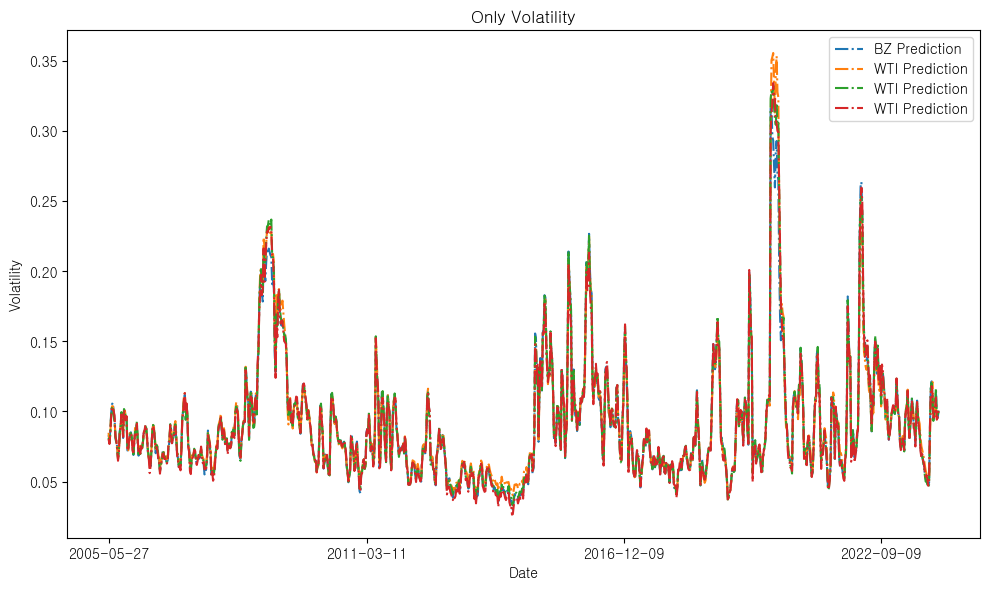

In [157]:
plt.figure(figsize=(10, 6))

start = 0
end = -1
plt.plot(pred_inv.iloc[start:end, 0], label='BZ Prediction', linestyle='-.')
# plt.plot(pred_inv2.iloc[start:end, 0], label='WTI Prediction', linestyle='--')
plt.plot(pred_inv3.iloc[start:end, 0], label='WTI Prediction', linestyle='-.')
# plt.plot(pred_inv4.iloc[start:end, 0], label='WTI Prediction', linestyle='--')
plt.plot(pred_inv5.iloc[start:end, 0], label='WTI Prediction', linestyle='-.')
# plt.plot(pred_inv6.iloc[start:end, 0], label='WTI Prediction', linestyle='--')
plt.plot(pred_inv7.iloc[start:end, 0], label='WTI Prediction', linestyle='-.')
# plt.plot(pred_inv8.iloc[start:end, 0], label='WTI Prediction', linestyle='--')

plt.title('Only Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(pred_inv.index[start:end:300])
plt.tight_layout()
plt.show()

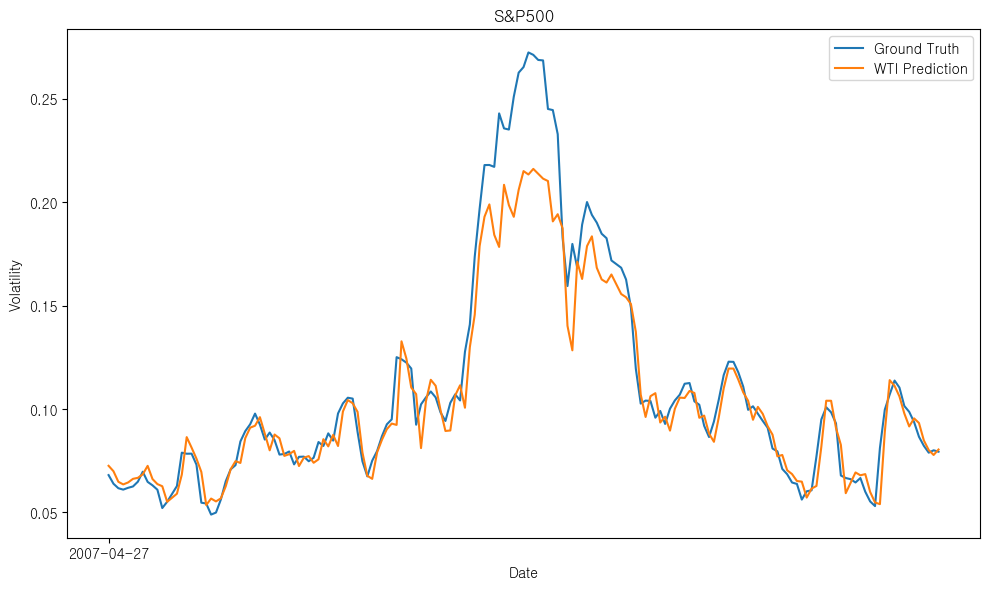

In [286]:
plt.figure(figsize=(10, 6))

start = 100
end = -700
# plt.plot(pred_inv3.iloc[start:end, 0], label='BZ Prediction', linestyle='--')
plt.plot(truth_inv.iloc[start:end, 0], label='Ground Truth')
plt.plot(pred_inv.iloc[start:end, 0], label='WTI Prediction')

plt.title('S&P500')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(pred_inv4.index[start:end:300])
plt.tight_layout()
plt.show()

50


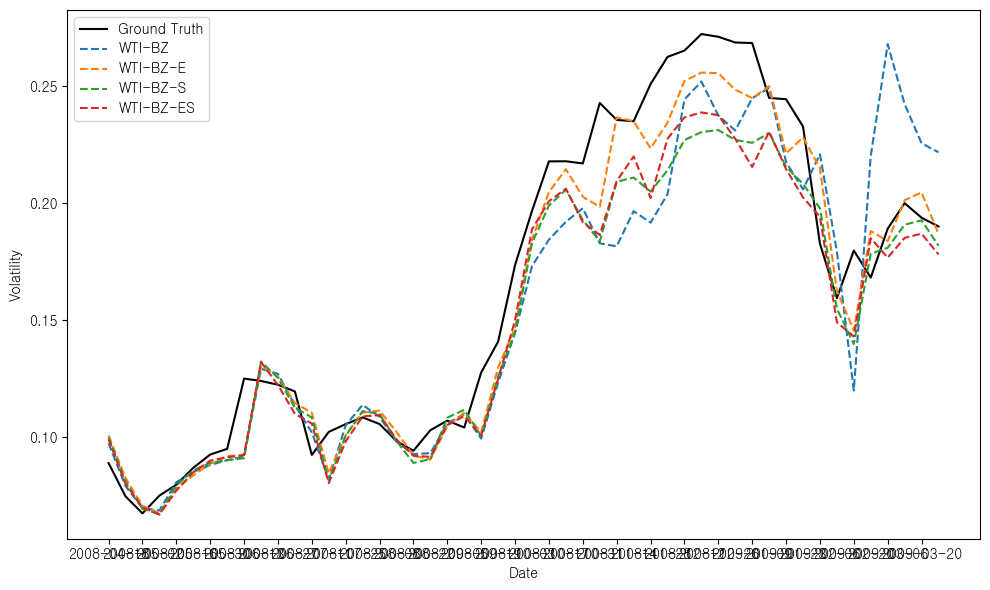

In [288]:
plt.figure(figsize=(10, 6))

start = 150
end = 200
plt.plot(truth_inv5.iloc[start:end, 0], label='Ground Truth', color='black', linestyle='-')
plt.plot(pred_inv2.iloc[start:end, 0], label='WTI-BZ', linestyle='--')
plt.plot(pred_inv4.iloc[start:end, 0], label='WTI-BZ-E', linestyle='--')
plt.plot(pred_inv6.iloc[start:end, 0], label='WTI-BZ-S', linestyle='--')
plt.plot(pred_inv8.iloc[start:end, 0], label='WTI-BZ-ES', linestyle='--')

print(len(pred_inv4.iloc[start:end, 0]))
plt.title('')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(pred_inv6.index[start:end:2])
plt.tight_layout()
plt.show()

In [7]:
metric_df = pd.DataFrame(
    index=['Total MAE', 'Total RMSE', 'Total MAPE', 'Total QLIKE', 'low_MAE', 'low_RMSE', 'low_MAPE', 'low QLIKE',
           '2008_MAE', '2008_RMSE',
           '2008_MAPE', '2008 QLIKE', 'corona_MAE', 'corona_RMSE', 'corona_MAPE', 'corona QLIKE'],
    columns=['BZ-BZ', 'WTI-BZ', 'BZ-BZ-E', 'WTI-BZ-E', 'BZ-BZ-S', 'WTI-BZ-S', 'BZ-BZ-ES', 'WTI-BZ-ES'])

In [8]:
metric_df.loc['Total MAE', 'BZ-BZ'] = calculate_mae(truth_inv.values, pred_inv.values)
metric_df.loc['Total MAE', 'WTI-BZ'] = calculate_mae(truth_inv2.values, pred_inv2.values)
metric_df.loc['Total RMSE', 'BZ-BZ'] = calculate_rmse(truth_inv.values, pred_inv.values)
metric_df.loc['Total RMSE', 'WTI-BZ'] = calculate_rmse(truth_inv2.values, pred_inv2.values)
metric_df.loc['Total MAPE', 'BZ-BZ'] = calculate_mape(truth_inv.values, pred_inv.values)
metric_df.loc['Total MAPE', 'WTI-BZ'] = calculate_mape(truth_inv2.values, pred_inv2.values)
metric_df.loc['Total QLIKE', 'BZ-BZ'] = calculate_QLIKE(truth_inv.values, pred_inv.values)
metric_df.loc['Total QLIKE', 'WTI-BZ'] = calculate_QLIKE(truth_inv2.values, pred_inv2.values)

metric_df.loc['low_MAE', 'BZ-BZ'] = calculate_mae(truth_inv.loc[:'2008-09-01', 'Ground Truths'].values,
                                                  pred_inv.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_MAE', 'WTI-BZ'] = calculate_mae(truth_inv2.loc[:'2008-09-01', 'Ground Truths'].values,
                                                   pred_inv2.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_RMSE', 'BZ-BZ'] = calculate_rmse(truth_inv.loc[:'2008-09-01', 'Ground Truths'].values,
                                                    pred_inv.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_RMSE', 'WTI-BZ'] = calculate_rmse(truth_inv2.loc[:'2008-09-01', 'Ground Truths'].values,
                                                     pred_inv2.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_MAPE', 'BZ-BZ'] = calculate_mape(truth_inv.loc[:'2008-09-01', 'Ground Truths'].values,
                                                    pred_inv.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_MAPE', 'WTI-BZ'] = calculate_mape(truth_inv2.loc[:'2008-09-01', 'Ground Truths'].values,
                                                     pred_inv2.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low QLIKE', 'BZ-BZ'] = calculate_QLIKE(truth_inv.loc[:'2008-09-01', 'Ground Truths'].values,
                                                      pred_inv.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low QLIKE', 'WTI-BZ'] = calculate_QLIKE(truth_inv2.loc[:'2008-09-01', 'Ground Truths'].values,
                                                       pred_inv2.loc[:'2008-09-01', 'Predictions'].values)

metric_df.loc['2008_MAE', 'BZ-BZ'] = calculate_mae(truth_inv.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
                                                   pred_inv.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_MAE', 'WTI-BZ'] = calculate_mae(truth_inv2.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
                                                    pred_inv2.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_RMSE', 'BZ-BZ'] = calculate_rmse(truth_inv.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
                                                     pred_inv.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_RMSE', 'WTI-BZ'] = calculate_rmse(truth_inv2.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
                                                      pred_inv2.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_MAPE', 'BZ-BZ'] = calculate_mape(truth_inv.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
                                                     pred_inv.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_MAPE', 'WTI-BZ'] = calculate_mape(truth_inv2.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
                                                      pred_inv2.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008 QLIKE', 'BZ-BZ'] = calculate_QLIKE(truth_inv.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
                                                       pred_inv.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008 QLIKE', 'WTI-BZ'] = calculate_QLIKE(
    truth_inv2.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv2.loc['2008-09-01':'2009-06-01', 'Predictions'].values)

metric_df.loc['corona_MAE', 'BZ-BZ'] = calculate_mae(truth_inv.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
                                                     pred_inv.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_MAE', 'WTI-BZ'] = calculate_mae(truth_inv2.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
                                                      pred_inv2.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_RMSE', 'BZ-BZ'] = calculate_rmse(truth_inv.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
                                                       pred_inv.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_RMSE', 'WTI-BZ'] = calculate_rmse(
    truth_inv2.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv2.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_MAPE', 'BZ-BZ'] = calculate_mape(truth_inv.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
                                                       pred_inv.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_MAPE', 'WTI-BZ'] = calculate_mape(
    truth_inv2.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv2.loc['2019-12-01':'2022-09-01', 'Predictions'].values)

metric_df.loc['corona QLIKE', 'BZ-BZ'] = calculate_QLIKE(
    truth_inv.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona QLIKE', 'WTI-BZ'] = calculate_QLIKE(
    truth_inv2.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv2.loc['2019-12-01':'2022-09-01', 'Predictions'].values)

In [9]:
metric_df.loc['Total MAE', 'BZ-BZ-E'] = calculate_mae(truth_inv3.iloc[:, 0].values, pred_inv3.iloc[:, 0].values)
metric_df.loc['Total MAE', 'WTI-BZ-E'] = calculate_mae(truth_inv4.iloc[:, 0].values, pred_inv4.iloc[:, 0].values)
metric_df.loc['Total RMSE', 'BZ-BZ-E'] = calculate_rmse(truth_inv3.iloc[:, 0].values, pred_inv3.iloc[:, 0].values)
metric_df.loc['Total RMSE', 'WTI-BZ-E'] = calculate_rmse(truth_inv4.iloc[:, 0].values, pred_inv4.iloc[:, 0].values)
metric_df.loc['Total MAPE', 'BZ-BZ-E'] = calculate_mape(truth_inv3.iloc[:, 0].values, pred_inv3.iloc[:, 0].values)
metric_df.loc['Total MAPE', 'WTI-BZ-E'] = calculate_mape(truth_inv4.iloc[:, 0].values, pred_inv4.iloc[:, 0].values)
metric_df.loc['Total QLIKE', 'BZ-BZ-E'] = calculate_QLIKE(truth_inv3.iloc[:, 0].values, pred_inv3.iloc[:, 0].values)
metric_df.loc['Total QLIKE', 'WTI-BZ-E'] = calculate_QLIKE(truth_inv4.iloc[:, 0].values, pred_inv4.iloc[:, 0].values)

metric_df.loc['low_MAE', 'BZ-BZ-E'] = calculate_mae(truth_inv3.loc[:'2008-09-01', 'Ground Truths'].values,
                                                    pred_inv3.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_MAE', 'WTI-BZ-E'] = calculate_mae(truth_inv4.loc[:'2008-09-01', 'Ground Truths'].values,
                                                     pred_inv4.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_RMSE', 'BZ-BZ-E'] = calculate_rmse(truth_inv3.loc[:'2008-09-01', 'Ground Truths'].values,
                                                      pred_inv3.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_RMSE', 'WTI-BZ-E'] = calculate_rmse(truth_inv4.loc[:'2008-09-01', 'Ground Truths'].values,
                                                       pred_inv4.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_MAPE', 'BZ-BZ-E'] = calculate_mape(truth_inv3.loc[:'2008-09-01', 'Ground Truths'].values,
                                                      pred_inv3.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_MAPE', 'WTI-BZ-E'] = calculate_mape(truth_inv4.loc[:'2008-09-01', 'Ground Truths'].values,
                                                       pred_inv4.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low QLIKE', 'BZ-BZ-E'] = calculate_QLIKE(truth_inv3.loc[:'2008-09-01', 'Ground Truths'].values,
                                                        pred_inv3.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low QLIKE', 'WTI-BZ-E'] = calculate_QLIKE(truth_inv4.loc[:'2008-09-01', 'Ground Truths'].values,
                                                         pred_inv4.loc[:'2008-09-01', 'Predictions'].values)

metric_df.loc['2008_MAE', 'BZ-BZ-E'] = calculate_mae(truth_inv3.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
                                                     pred_inv3.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_MAE', 'WTI-BZ-E'] = calculate_mae(truth_inv4.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
                                                      pred_inv4.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_RMSE', 'BZ-BZ-E'] = calculate_rmse(
    truth_inv3.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv3.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_RMSE', 'WTI-BZ-E'] = calculate_rmse(
    truth_inv4.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv4.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_MAPE', 'BZ-BZ-E'] = calculate_mape(
    truth_inv3.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv3.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_MAPE', 'WTI-BZ-E'] = calculate_mape(
    truth_inv4.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv4.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008 QLIKE', 'BZ-BZ-E'] = calculate_QLIKE(
    truth_inv3.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv3.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008 QLIKE', 'WTI-BZ-E'] = calculate_QLIKE(
    truth_inv4.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv4.loc['2008-09-01':'2009-06-01', 'Predictions'].values)

metric_df.loc['corona_MAE', 'BZ-BZ-E'] = calculate_mae(
    truth_inv3.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv3.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_MAE', 'WTI-BZ-E'] = calculate_mae(
    truth_inv4.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv4.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_RMSE', 'BZ-BZ-E'] = calculate_rmse(
    truth_inv3.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv3.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_RMSE', 'WTI-BZ-E'] = calculate_rmse(
    truth_inv4.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv4.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_MAPE', 'BZ-BZ-E'] = calculate_mape(
    truth_inv3.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv3.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_MAPE', 'WTI-BZ-E'] = calculate_mape(
    truth_inv4.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv4.loc['2019-12-01':'2022-09-01', 'Predictions'].values)

metric_df.loc['corona QLIKE', 'BZ-BZ-E'] = calculate_QLIKE(
    truth_inv3.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv3.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona QLIKE', 'WTI-BZ-E'] = calculate_QLIKE(
    truth_inv4.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv4.loc['2019-12-01':'2022-09-01', 'Predictions'].values)

In [10]:
metric_df.loc['Total MAE', 'BZ-BZ-S'] = calculate_mae(truth_inv5.values, pred_inv5.values)
metric_df.loc['Total MAE', 'WTI-BZ-S'] = calculate_mae(truth_inv6.values, pred_inv6.values)
metric_df.loc['Total RMSE', 'BZ-BZ-S'] = calculate_rmse(truth_inv5.values, pred_inv5.values)
metric_df.loc['Total RMSE', 'WTI-BZ-S'] = calculate_rmse(truth_inv6.values, pred_inv6.values)
metric_df.loc['Total MAPE', 'BZ-BZ-S'] = calculate_mape(truth_inv5.values, pred_inv5.values)
metric_df.loc['Total MAPE', 'WTI-BZ-S'] = calculate_mape(truth_inv6.values, pred_inv6.values)
metric_df.loc['Total QLIKE', 'BZ-BZ-S'] = calculate_QLIKE(truth_inv5.values, pred_inv5.values)
metric_df.loc['Total QLIKE', 'WTI-BZ-S'] = calculate_QLIKE(truth_inv6.values, pred_inv6.values)

metric_df.loc['low_MAE', 'BZ-BZ-S'] = calculate_mae(truth_inv5.loc[:'2008-09-01', 'Ground Truths'].values,
                                                    pred_inv5.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_MAE', 'WTI-BZ-S'] = calculate_mae(truth_inv6.loc[:'2008-09-01', 'Ground Truths'].values,
                                                     pred_inv6.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_RMSE', 'BZ-BZ-S'] = calculate_rmse(truth_inv5.loc[:'2008-09-01', 'Ground Truths'].values,
                                                      pred_inv5.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_RMSE', 'WTI-BZ-S'] = calculate_rmse(truth_inv6.loc[:'2008-09-01', 'Ground Truths'].values,
                                                       pred_inv6.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_MAPE', 'BZ-BZ-S'] = calculate_mape(truth_inv5.loc[:'2008-09-01', 'Ground Truths'].values,
                                                      pred_inv5.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_MAPE', 'WTI-BZ-S'] = calculate_mape(truth_inv6.loc[:'2008-09-01', 'Ground Truths'].values,
                                                       pred_inv6.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low QLIKE', 'BZ-BZ-S'] = calculate_QLIKE(truth_inv5.loc[:'2008-09-01', 'Ground Truths'].values,
                                                        pred_inv5.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low QLIKE', 'WTI-BZ-S'] = calculate_QLIKE(truth_inv6.loc[:'2008-09-01', 'Ground Truths'].values,
                                                         pred_inv6.loc[:'2008-09-01', 'Predictions'].values)

metric_df.loc['2008_MAE', 'BZ-BZ-S'] = calculate_mae(truth_inv5.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
                                                     pred_inv5.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_MAE', 'WTI-BZ-S'] = calculate_mae(truth_inv6.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
                                                      pred_inv6.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_RMSE', 'BZ-BZ-S'] = calculate_rmse(
    truth_inv5.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv5.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_RMSE', 'WTI-BZ-S'] = calculate_rmse(
    truth_inv6.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv6.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_MAPE', 'BZ-BZ-S'] = calculate_mape(
    truth_inv5.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv5.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_MAPE', 'WTI-BZ-S'] = calculate_mape(
    truth_inv6.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv6.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008 QLIKE', 'BZ-BZ-S'] = calculate_QLIKE(
    truth_inv5.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv5.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008 QLIKE', 'WTI-BZ-S'] = calculate_QLIKE(
    truth_inv6.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv6.loc['2008-09-01':'2009-06-01', 'Predictions'].values)

metric_df.loc['corona_MAE', 'BZ-BZ-S'] = calculate_mae(
    truth_inv5.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv5.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_MAE', 'WTI-BZ-S'] = calculate_mae(
    truth_inv6.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv6.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_RMSE', 'BZ-BZ-S'] = calculate_rmse(
    truth_inv5.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv5.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_RMSE', 'WTI-BZ-S'] = calculate_rmse(
    truth_inv6.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv6.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_MAPE', 'BZ-BZ-S'] = calculate_mape(
    truth_inv5.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv5.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_MAPE', 'WTI-BZ-S'] = calculate_mape(
    truth_inv6.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv6.loc['2019-12-01':'2022-09-01', 'Predictions'].values)

metric_df.loc['corona QLIKE', 'BZ-BZ-S'] = calculate_QLIKE(
    truth_inv5.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv5.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona QLIKE', 'WTI-BZ-S'] = calculate_QLIKE(
    truth_inv6.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv6.loc['2019-12-01':'2022-09-01', 'Predictions'].values)

In [11]:
metric_df.loc['Total MAE', 'BZ-BZ-ES'] = calculate_mae(truth_inv7.values, pred_inv7.values)
metric_df.loc['Total MAE', 'WTI-BZ-ES'] = calculate_mae(truth_inv8.values, pred_inv8.values)
metric_df.loc['Total RMSE', 'BZ-BZ-ES'] = calculate_rmse(truth_inv7.values, pred_inv7.values)
metric_df.loc['Total RMSE', 'WTI-BZ-ES'] = calculate_rmse(truth_inv8.values, pred_inv8.values)
metric_df.loc['Total MAPE', 'BZ-BZ-ES'] = calculate_mape(truth_inv7.values, pred_inv7.values)
metric_df.loc['Total MAPE', 'WTI-BZ-ES'] = calculate_mape(truth_inv8.values, pred_inv8.values)
metric_df.loc['Total QLIKE', 'BZ-BZ-ES'] = calculate_QLIKE(truth_inv7.values, pred_inv7.values)
metric_df.loc['Total QLIKE', 'WTI-BZ-ES'] = calculate_QLIKE(truth_inv8.values, pred_inv8.values)

metric_df.loc['low_MAE', 'BZ-BZ-ES'] = calculate_mae(truth_inv7.loc[:'2008-09-01', 'Ground Truths'].values,
                                                     pred_inv7.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_MAE', 'WTI-BZ-ES'] = calculate_mae(truth_inv8.loc[:'2008-09-01', 'Ground Truths'].values,
                                                      pred_inv8.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_RMSE', 'BZ-BZ-ES'] = calculate_rmse(truth_inv7.loc[:'2008-09-01', 'Ground Truths'].values,
                                                       pred_inv7.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_RMSE', 'WTI-BZ-ES'] = calculate_rmse(truth_inv8.loc[:'2008-09-01', 'Ground Truths'].values,
                                                        pred_inv8.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_MAPE', 'BZ-BZ-ES'] = calculate_mape(truth_inv7.loc[:'2008-09-01', 'Ground Truths'].values,
                                                       pred_inv7.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low_MAPE', 'WTI-BZ-ES'] = calculate_mape(truth_inv8.loc[:'2008-09-01', 'Ground Truths'].values,
                                                        pred_inv8.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low QLIKE', 'BZ-BZ-ES'] = calculate_QLIKE(truth_inv7.loc[:'2008-09-01', 'Ground Truths'].values,
                                                         pred_inv7.loc[:'2008-09-01', 'Predictions'].values)
metric_df.loc['low QLIKE', 'WTI-BZ-ES'] = calculate_QLIKE(truth_inv8.loc[:'2008-09-01', 'Ground Truths'].values,
                                                          pred_inv8.loc[:'2008-09-01', 'Predictions'].values)

metric_df.loc['2008_MAE', 'BZ-BZ-ES'] = calculate_mae(truth_inv7.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
                                                      pred_inv7.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_MAE', 'WTI-BZ-ES'] = calculate_mae(
    truth_inv8.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv8.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_RMSE', 'BZ-BZ-ES'] = calculate_rmse(
    truth_inv7.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv7.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_RMSE', 'WTI-BZ-ES'] = calculate_rmse(
    truth_inv8.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv8.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_MAPE', 'BZ-BZ-ES'] = calculate_mape(
    truth_inv7.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv7.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008_MAPE', 'WTI-BZ-ES'] = calculate_mape(
    truth_inv8.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv8.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008 QLIKE', 'BZ-BZ-ES'] = calculate_QLIKE(
    truth_inv7.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv7.loc['2008-09-01':'2009-06-01', 'Predictions'].values)
metric_df.loc['2008 QLIKE', 'WTI-BZ-ES'] = calculate_QLIKE(
    truth_inv8.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values,
    pred_inv8.loc['2008-09-01':'2009-06-01', 'Predictions'].values)

metric_df.loc['corona_MAE', 'BZ-BZ-ES'] = calculate_mae(
    truth_inv7.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv7.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_MAE', 'WTI-BZ-ES'] = calculate_mae(
    truth_inv8.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv8.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_RMSE', 'BZ-BZ-ES'] = calculate_rmse(
    truth_inv7.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv7.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_RMSE', 'WTI-BZ-ES'] = calculate_rmse(
    truth_inv8.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv8.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_MAPE', 'BZ-BZ-ES'] = calculate_mape(
    truth_inv7.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv7.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona_MAPE', 'WTI-BZ-ES'] = calculate_mape(
    truth_inv8.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv8.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona QLIKE', 'BZ-BZ-ES'] = calculate_QLIKE(
    truth_inv7.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv7.loc['2019-12-01':'2022-09-01', 'Predictions'].values)
metric_df.loc['corona QLIKE', 'WTI-BZ-ES'] = calculate_QLIKE(
    truth_inv8.loc['2019-12-01':'2022-09-01', 'Ground Truths'].values,
    pred_inv8.loc['2019-12-01':'2022-09-01', 'Predictions'].values)

In [12]:
metric_df.iloc[:, :]

,BZ-BZ,WTI-BZ,BZ-BZ-E,WTI-BZ-E,BZ-BZ-S,WTI-BZ-S,BZ-BZ-ES,WTI-BZ-ES
Total MAE,0.009561,0.009103,0.009363,0.009028,0.009129,0.008538,0.009,0.008424
Total RMSE,0.018931,0.017548,0.01601,0.015027,0.016713,0.014704,0.016888,0.014618
Total MAPE,0.096309,0.091686,0.108551,0.106084,0.097939,0.093222,0.0916,0.092407
Total QLIKE,0.009829,0.009538,0.010958,0.010618,0.009809,0.008795,0.009142,0.008744
low_MAE,0.005105,0.004883,0.005506,0.005124,0.005263,0.005298,0.005156,0.00532
low_RMSE,0.00681,0.00652,0.007095,0.006879,0.006963,0.007025,0.006919,0.007008
low_MAPE,0.065757,0.062951,0.073008,0.065865,0.068153,0.068821,0.065981,0.069187
low QLIKE,0.00358,0.003322,0.004085,0.003675,0.003783,0.003826,0.003691,0.003841
2008_MAE,0.028146,0.030451,0.020952,0.013588,0.022117,0.02095,0.02428,0.020454
2008_RMSE,0.03411,0.035644,0.025312,0.017557,0.02615,0.025951,0.028621,0.024806


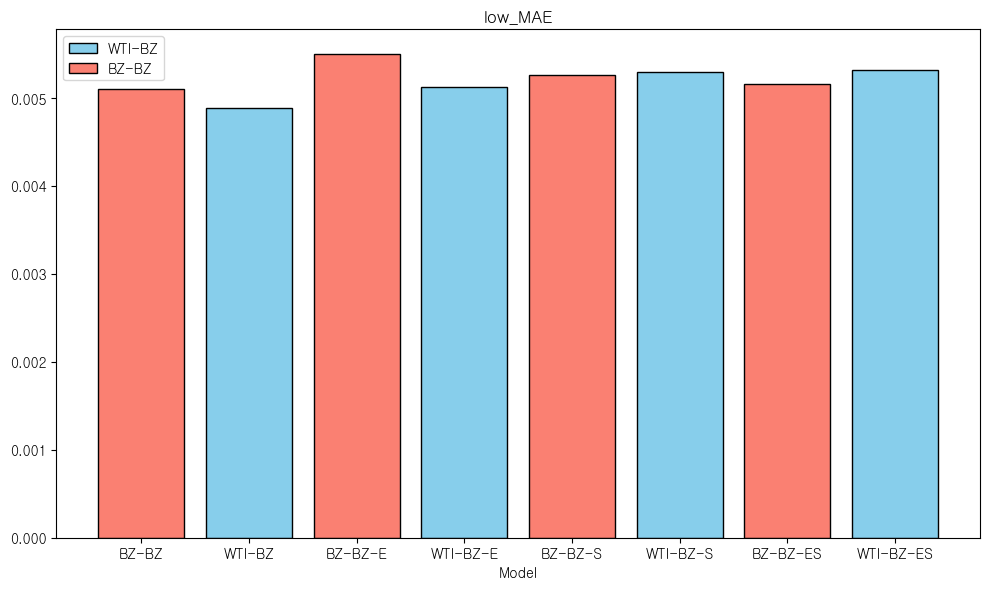

In [13]:
# 특정 행을 선택 (예: 첫 번째 행)
row_index = 4
row_data = metric_df.iloc[row_index, :]

colors = ['salmon' if i % 2 == 0 else 'skyblue' for i in range(len(row_data))]

# 히스토그램 생성
plt.figure(figsize=(10, 6))
plt.bar(row_data.index, row_data.values, color=colors, edgecolor='black')
from matplotlib.patches import Patch

legend_elements = [Patch(facecolor='skyblue', edgecolor='black', label='WTI-BZ'),
                   Patch(facecolor='salmon', edgecolor='black', label='BZ-BZ')]
plt.legend(handles=legend_elements)
# 그래프 제목과 축 레이블 설정
plt.title(f'{row_data.name}')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

In [101]:
from scipy.stats import norm
from statsmodels.tsa.stattools import acf

def dm_test(actual, pred1, pred2, crit="AE"):
    e1 = actual - pred1
    e2 = actual - pred2

    if crit == "SE":
        e1 = e1 ** 2
        e2 = e2 ** 2

    elif crit == "AE":
        e1 = np.abs(e1)
        e2 = np.abs(e2)

    d = e1 - e2
    mean_d = np.mean(d)
    H = len(d)

    gamma_0 = np.var(d)
    acf_values = acf(d, nlags=20)[1:]
    gamma_k = np.sum(acf_values * gamma_0)

    var_d = (gamma_0+ 2 * gamma_k) / (H - 1)
    dm_stat = mean_d / np.sqrt(var_d)
    p_value = 2 * (1 - norm.cdf(np.abs(dm_stat)))

    return dm_stat, p_value

In [102]:
model_dict = {}

model_dict['BZ-BZ'] = pred_inv.values
model_dict['WTI-BZ'] = pred_inv2.values
model_dict['BZ-BZ-E'] = pred_inv3.iloc[:, 0].values
model_dict['WTI-BZ-E'] = pred_inv4.iloc[:, 0].values
model_dict['BZ-BZ-S'] = pred_inv5.values
model_dict['WTI-BZ-S'] = pred_inv6.values
model_dict['BZ-BZ-ES'] = pred_inv7.values
model_dict['WTI-BZ-ES'] = pred_inv8.values

In [103]:
import itertools

DM_df = pd.DataFrame(columns=['Pair of models', 'DM statistic', 'P-value'])
i = 0
for (key1, value1), (key2, value2) in itertools.combinations(model_dict.items(), 2):
    i += 1
    print(i)
    value1=value1.reshape(-1,1)
    value2=value2.reshape(-1,1)

    dm_stat, p_value = dm_test(truth_inv.values, value1, value2, "SE")
    new_row = pd.DataFrame({
        'Pair of models': [f"{key1} vs. {key2}"],
        'DM statistic': [dm_stat],
        'P-value': [p_value]
    })
    DM_df = pd.concat([DM_df, new_row], ignore_index=True)

    if p_value < 0.05:
        if dm_stat > 0:
            print(f'{dm_stat:.4f}, {p_value:.4f}')
            print(f"{key1} vs {key2}")
            print(f"{key1} better than {key2}")
        else:
            print(f'{dm_stat:.4f}, {p_value:.4f}')
            print(f"{key1} vs {key2}")
            print(f"{key2} better than {key1}")
    else:
        print(f'{dm_stat:.4f}, {p_value:.4f}')
        print(f"{key1} and {key2} have same model performance")

1
1.0236, 0.3060
BZ-BZ and WTI-BZ have same model performance
2
1.0924, 0.2746
BZ-BZ and BZ-BZ-E have same model performance
3
1.1026, 0.2702
BZ-BZ and WTI-BZ-E have same model performance
4
1.2067, 0.2275
BZ-BZ and BZ-BZ-S have same model performance
5
1.2091, 0.2266
BZ-BZ and WTI-BZ-S have same model performance
6
1.1866, 0.2354
BZ-BZ and BZ-BZ-ES have same model performance
7
1.2071, 0.2274
BZ-BZ and WTI-BZ-ES have same model performance
8
1.0040, 0.3154
WTI-BZ and BZ-BZ-E have same model performance
9
1.0486, 0.2944
WTI-BZ and WTI-BZ-E have same model performance
10
0.9397, 0.3473
WTI-BZ and BZ-BZ-S have same model performance
11
1.2507, 0.2111
WTI-BZ and WTI-BZ-S have same model performance
12
0.8956, 0.3705
WTI-BZ and BZ-BZ-ES have same model performance
13
1.2489, 0.2117
WTI-BZ and WTI-BZ-ES have same model performance
14
1.0848, 0.2780
BZ-BZ-E and WTI-BZ-E have same model performance
15
-0.8015, 0.4229
BZ-BZ-E and BZ-BZ-S have same model performance
16
1.5659, 0.1174
BZ-BZ-E an

C:\Users\asas4\AppData\Local\Temp\ipykernel_13812\1432630711.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  DM_df = pd.concat([DM_df, new_row], ignore_index=True)


In [94]:
DM_df.to_csv('Files/dm_test.csv')

# Summary of Volatility Statistics

In [93]:
BZ_vol = pd.read_csv('Database/BZ_vol_only_scaledX.csv', index_col=0)
SP_vol = pd.read_csv('Database/SP_vol_only_scaledX.csv', index_col=0)

In [322]:
BZ_Statistic_df = pd.concat([BZ_vol.describe(), BZ_vol.kurtosis(), BZ_vol.skew()], axis=0)
BZ_Statistic_df

,return,0
count,1266.000000,NaN
mean,0.093722,NaN
std,0.048048,NaN
min,0.022641,NaN
25%,0.065228,NaN
50%,0.083324,NaN
75%,0.106767,NaN
max,0.448219,NaN
return,NaN,14.360316
return,NaN,2.939221


In [323]:
SP_Statistic_df = pd.concat([SP_vol.describe(), SP_vol.kurtosis(), SP_vol.skew()], axis=0)
SP_Statistic_df

,return,0
count,1995.000000,NaN
mean,0.101009,NaN
std,0.058374,NaN
min,0.030718,NaN
25%,0.068307,NaN
50%,0.087747,NaN
75%,0.116946,NaN
max,0.732539,NaN
return,NaN,27.526132
return,NaN,3.855858


In [324]:
from scipy.stats import jarque_bera


def jarque_bera_test(data):
    # Perform Jarque-Bera test
    jb_stat, jb_p_value = jarque_bera(data)
    return jb_stat, jb_p_value

In [325]:
from statsmodels.tsa.stattools import adfuller


def adf_test(data):
    # Perform Augmented Dickey-Fuller test
    adf_stat, adf_p_value, _, _, _, _ = adfuller(data)
    return adf_stat, adf_p_value

In [326]:
print(jarque_bera_test(SP_vol.values))
print(adf_test(SP_vol.values))

print(jarque_bera_test(BZ_vol.values))
print(adf_test(BZ_vol.values))

(67590.05848960979, 0.0)
(-6.7201861339959486, 3.4990599078329017e-09)
(12603.74398139212, 0.0)
(-4.556695574231602, 0.00015511034474674894)


# NLP

In [28]:
_nlp = pd.read_csv('Files/NLP/Embedding.csv', index_col=0)
_nlp.index = pd.to_datetime(_nlp.index)
text_df = pd.read_csv('Database/NLP/SP_vol_384.csv', index_col=0)
text_df.index = pd.to_datetime(text_df.index)
loaded_scaler_embedding = load('Database/Scaler/scaler_Embedding.joblib')

pred_nlp = pd.concat([_nlp['Predictions'], text_df.iloc[:, 1:]], axis=1).dropna()
truth_nlp = pd.concat([_nlp['Ground Truths'], text_df.iloc[:, 1:]], axis=1).dropna()
pred1 = loaded_scaler_embedding.inverse_transform(pred_nlp)
truth1 = loaded_scaler_embedding.inverse_transform(truth_nlp)
pred_inv = pd.DataFrame(pred1, columns=pred_nlp.columns, index=pred_nlp.index)
truth_inv = pd.DataFrame(truth1, columns=truth_nlp.columns, index=truth_nlp.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


In [38]:
_nlp = pd.read_csv('Files/NLP/Sentiment.csv', index_col=0)
_nlp.index = pd.to_datetime(_nlp.index)
text_df = pd.read_csv('Database/NLP/SP_vol_sentiment.csv', index_col=0)
text_df.index = pd.to_datetime(text_df.index)
loaded_scaler_embedding = load('Database/Scaler/scaler_1_Sentiment.joblib')

pred_nlp = pd.concat([_nlp['Predictions'], text_df.iloc[:, 1:]], axis=1).dropna()
truth_nlp = pd.concat([_nlp['Ground Truths'], text_df.iloc[:, 1:]], axis=1).dropna()
pred1 = loaded_scaler_embedding.inverse_transform(pred_nlp)
truth1 = loaded_scaler_embedding.inverse_transform(truth_nlp)
pred_inv = pd.DataFrame(pred1, columns=pred_nlp.columns, index=pred_nlp.index)
truth_inv = pd.DataFrame(truth1, columns=truth_nlp.columns, index=truth_nlp.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


In [40]:
_nlp = pd.read_csv('Files/NLP/UMAP75.csv', index_col=0)
_nlp.index = pd.to_datetime(_nlp.index)
text_df = pd.read_csv('Database/NLP/SP_vol_UMAP75.csv', index_col=0)
text_df.index = pd.to_datetime(text_df.index)
loaded_scaler_embedding = load('Database/Scaler/scaler_UMAP75.joblib')

pred_nlp = pd.concat([_nlp['Predictions'], text_df.iloc[:, 1:]], axis=1).dropna()
truth_nlp = pd.concat([_nlp['Ground Truths'], text_df.iloc[:, 1:]], axis=1).dropna()
pred1 = loaded_scaler_embedding.inverse_transform(pred_nlp)
truth1 = loaded_scaler_embedding.inverse_transform(truth_nlp)
pred_inv = pd.DataFrame(pred1, columns=pred_nlp.columns, index=pred_nlp.index)
truth_inv = pd.DataFrame(truth1, columns=truth_nlp.columns, index=truth_nlp.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


In [36]:
_nlp = pd.read_csv('Files/NLP/IE.csv', index_col=0)
_nlp.index = pd.to_datetime(_nlp.index)
text_df = pd.read_csv('Database/NLP/SP_vol_IE.csv', index_col=0)
text_df.index = pd.to_datetime(text_df.index)
loaded_scaler_embedding = load('Database/Scaler/scaler_IE.joblib')

pred_nlp = pd.concat([_nlp['Predictions'], text_df.iloc[:, 1:]], axis=1).dropna()
truth_nlp = pd.concat([_nlp['Ground Truths'], text_df.iloc[:, 1:]], axis=1).dropna()
pred1 = loaded_scaler_embedding.inverse_transform(pred_nlp)
truth1 = loaded_scaler_embedding.inverse_transform(truth_nlp)
pred_inv = pd.DataFrame(pred1, columns=pred_nlp.columns, index=pred_nlp.index)
truth_inv = pd.DataFrame(truth1, columns=truth_nlp.columns, index=truth_nlp.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


In [42]:
_nlp = pd.read_csv('Files/NLP/UMAP100.csv', index_col=0)
_nlp.index = pd.to_datetime(_nlp.index)
text_df = pd.read_csv('Database/NLP/SP_vol_UMAP100.csv', index_col=0)
text_df.index = pd.to_datetime(text_df.index)
loaded_scaler_embedding = load('Database/Scaler/scaler_UMAP100.joblib')

pred_nlp = pd.concat([_nlp['Predictions'], text_df.iloc[:, 1:]], axis=1).dropna()
truth_nlp = pd.concat([_nlp['Ground Truths'], text_df.iloc[:, 1:]], axis=1).dropna()
pred1 = loaded_scaler_embedding.inverse_transform(pred_nlp)
truth1 = loaded_scaler_embedding.inverse_transform(truth_nlp)
pred_inv = pd.DataFrame(pred1, columns=pred_nlp.columns, index=pred_nlp.index)
truth_inv = pd.DataFrame(truth1, columns=truth_nlp.columns, index=truth_nlp.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


In [22]:
vol = pd.read_csv('Files/NLP/additionalX_SP.csv', index_col=0)
vol.index = pd.to_datetime(vol.index)
vol = vol['Predictions']

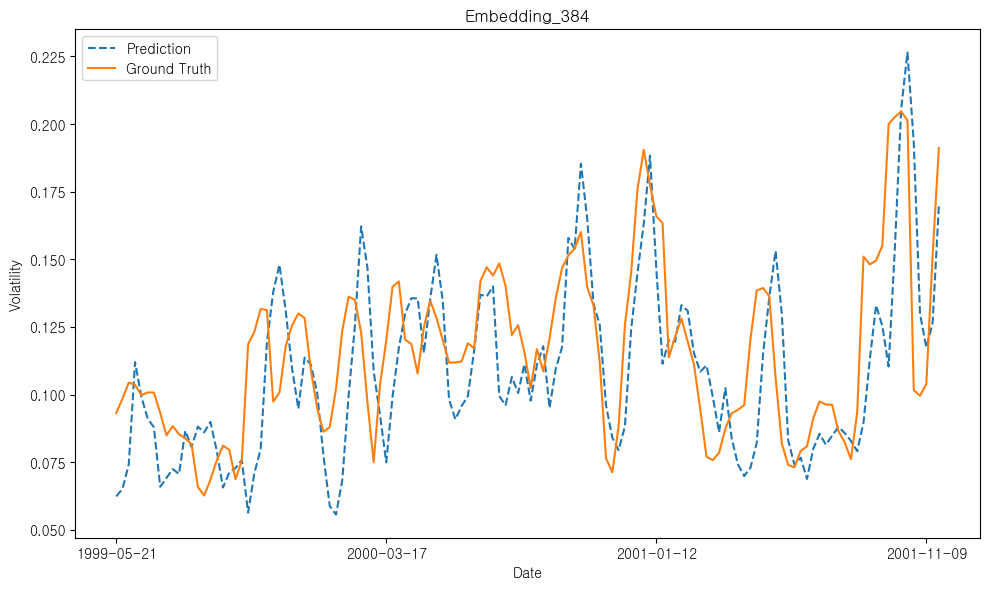

In [23]:
plt.figure(figsize=(10, 6))

start = 0
end = -1
plt.plot(pred_inv.iloc[start:end, 0], label='Prediction', linestyle='--')
# plt.plot(vol, label='Ground Truth', color='gray')
plt.plot(truth_inv.iloc[start:end, 0], label='Ground Truth')

plt.title('Embedding_384')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(pred_inv.index[start:end:43])
plt.tight_layout()
plt.show()

In [43]:
print('NEWS_Total')
print(calculate_mae(truth_inv.iloc[:, 0].values, pred_inv.iloc[:, 0].values))
print(calculate_rmse(truth_inv.iloc[:, 0].values, pred_inv.iloc[:, 0].values))
print(calculate_mape(truth_inv.iloc[:, 0].values, pred_inv.iloc[:, 0].values))
print(calculate_QLIKE(truth_inv.iloc[:, 0].values, pred_inv.iloc[:, 0].values))
print(f'{r2_score(truth_inv.iloc[:, 0].values, pred_inv.iloc[:, 0].values):.4f}')

NEWS_Total
0.021333186366488333
0.027708806157870053
0.18664718372676153
0.03515136648586357
0.2563


In [27]:
print('VOL_Total')
print(calculate_mae(truth_inv.iloc[:, 0].values, vol.values))
print(calculate_rmse(truth_inv.iloc[:, 0].values, vol.values))
print(calculate_mape(truth_inv.iloc[:, 0].values, vol.values))
print(calculate_QLIKE(truth_inv.iloc[:, 0].values, vol.values))
print(f'{r2_score(truth_inv.iloc[:, 0].values, vol.values):.4f}')

VOL_Total
0.012153971878666056
0.016880721580178653
0.11149821354795195
0.009759166163851534
0.7240
